In [1]:
#Load pandas 
import pandas as pd 

In [2]:
#Load the data
data_path = 'Invistico_Airline.csv'
airline_data = pd.read_csv(data_path)
airline_data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
#Look for missing values from data 
missing_values = airline_data.isnull().sum()
data_types = airline_data.dtypes
missing_values, data_types

(satisfaction                           0
 Gender                                 0
 Customer Type                          0
 Age                                    0
 Type of Travel                         0
 Class                                  0
 Flight Distance                        0
 Seat comfort                           0
 Departure/Arrival time convenient      0
 Food and drink                         0
 Gate location                          0
 Inflight wifi service                  0
 Inflight entertainment                 0
 Online support                         0
 Ease of Online booking                 0
 On-board service                       0
 Leg room service                       0
 Baggage handling                       0
 Checkin service                        0
 Cleanliness                            0
 Online boarding                        0
 Departure Delay in Minutes             0
 Arrival Delay in Minutes             393
 dtype: int64,
 satisfaction      

In [4]:
#Remove the missing values from data 
airline_data_cleaned = airline_data.dropna(subset=['Arrival Delay in Minutes'])
airline_data_cleaned.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [5]:
#Encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
categorical_columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in categorical_columns:
    airline_data_cleaned[col] = le.fit_transform(airline_data_cleaned[col])
airline_data_cleaned.head()

/var/folders/g7/5d4ykcq51t97dsfc9rqcy9d80000gn/T/ipykernel_9355/2526200179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data_cleaned[col] = le.fit_transform(airline_data_cleaned[col])
/var/folders/g7/5d4ykcq51t97dsfc9rqcy9d80000gn/T/ipykernel_9355/2526200179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data_cleaned[col] = le.fit_transform(airline_data_cleaned[col])
/var/folders/g7/5d4ykcq51t97dsfc9rqcy9d80000gn/T/ipykernel_9355/2526200179.py:5: SettingWithCopyWarning: 
A value 

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 

# Features and Target
X = airline_data_cleaned.drop('satisfaction', axis=1)
y = airline_data_cleaned['satisfaction']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.959031585450614,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96     11821\n           1       0.97      0.96      0.96     14077\n\n    accuracy                           0.96     25898\n   macro avg       0.96      0.96      0.96     25898\nweighted avg       0.96      0.96      0.96     25898\n')

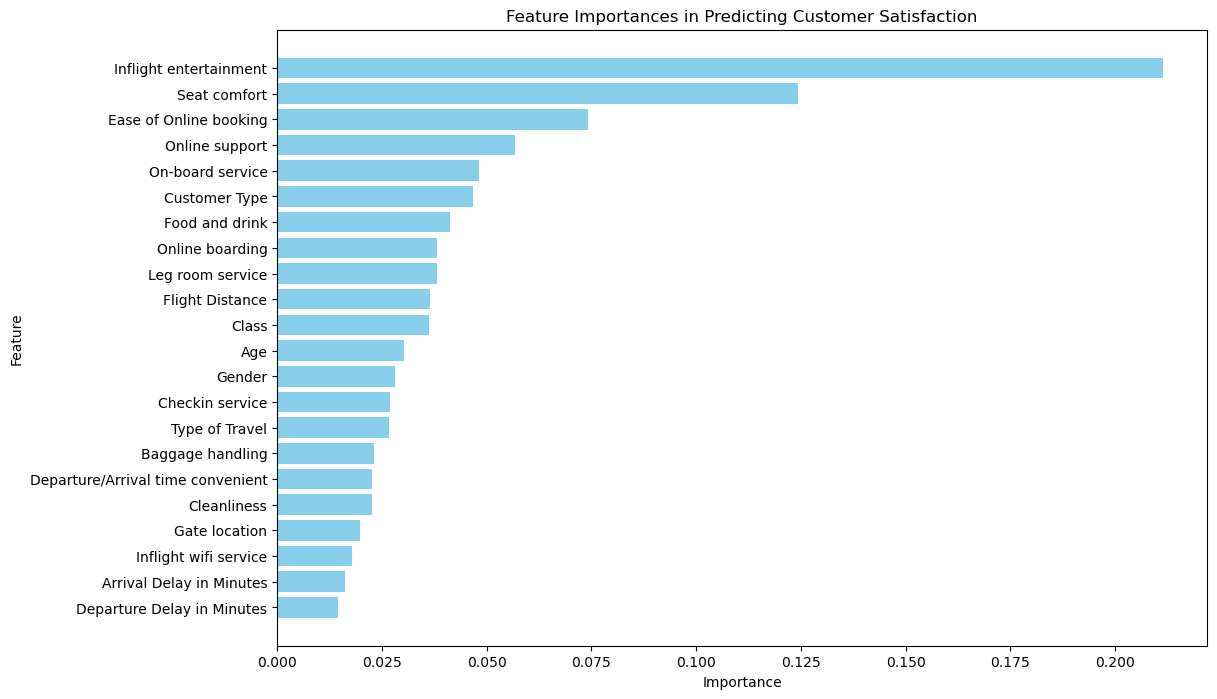

In [7]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Customer Satisfaction')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.show()


/var/folders/g7/5d4ykcq51t97dsfc9rqcy9d80000gn/T/ipykernel_9355/2362118717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data_cleaned['satisfaction_category'] = airline_data_cleaned['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'})


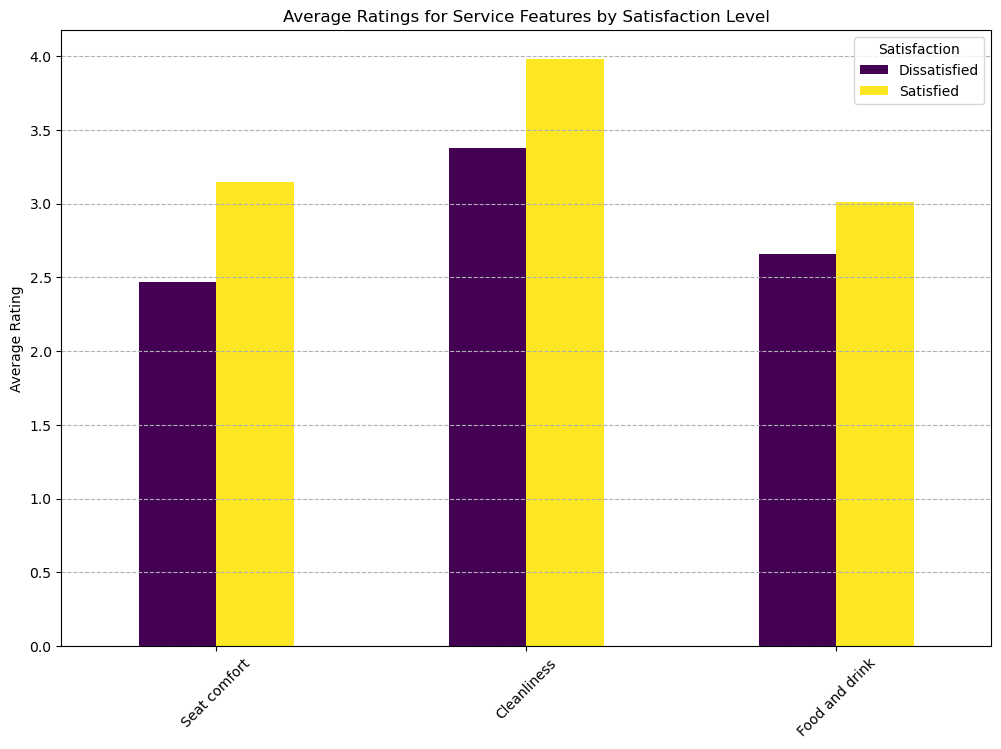

In [9]:
# Mapping satisfaction back to categorical for visualization
airline_data_cleaned['satisfaction_category'] = airline_data_cleaned['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'})

# Selecting service features for comparison
service_features = ['Seat comfort', 'Cleanliness', 'Food and drink']

# Grouping by satisfaction and calculating the mean for selected features
service_comparison = airline_data_cleaned.groupby('satisfaction_category')[service_features].mean().T

# Plotting the bar chart
service_comparison.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Average Ratings for Service Features by Satisfaction Level')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Satisfaction')
plt.show()


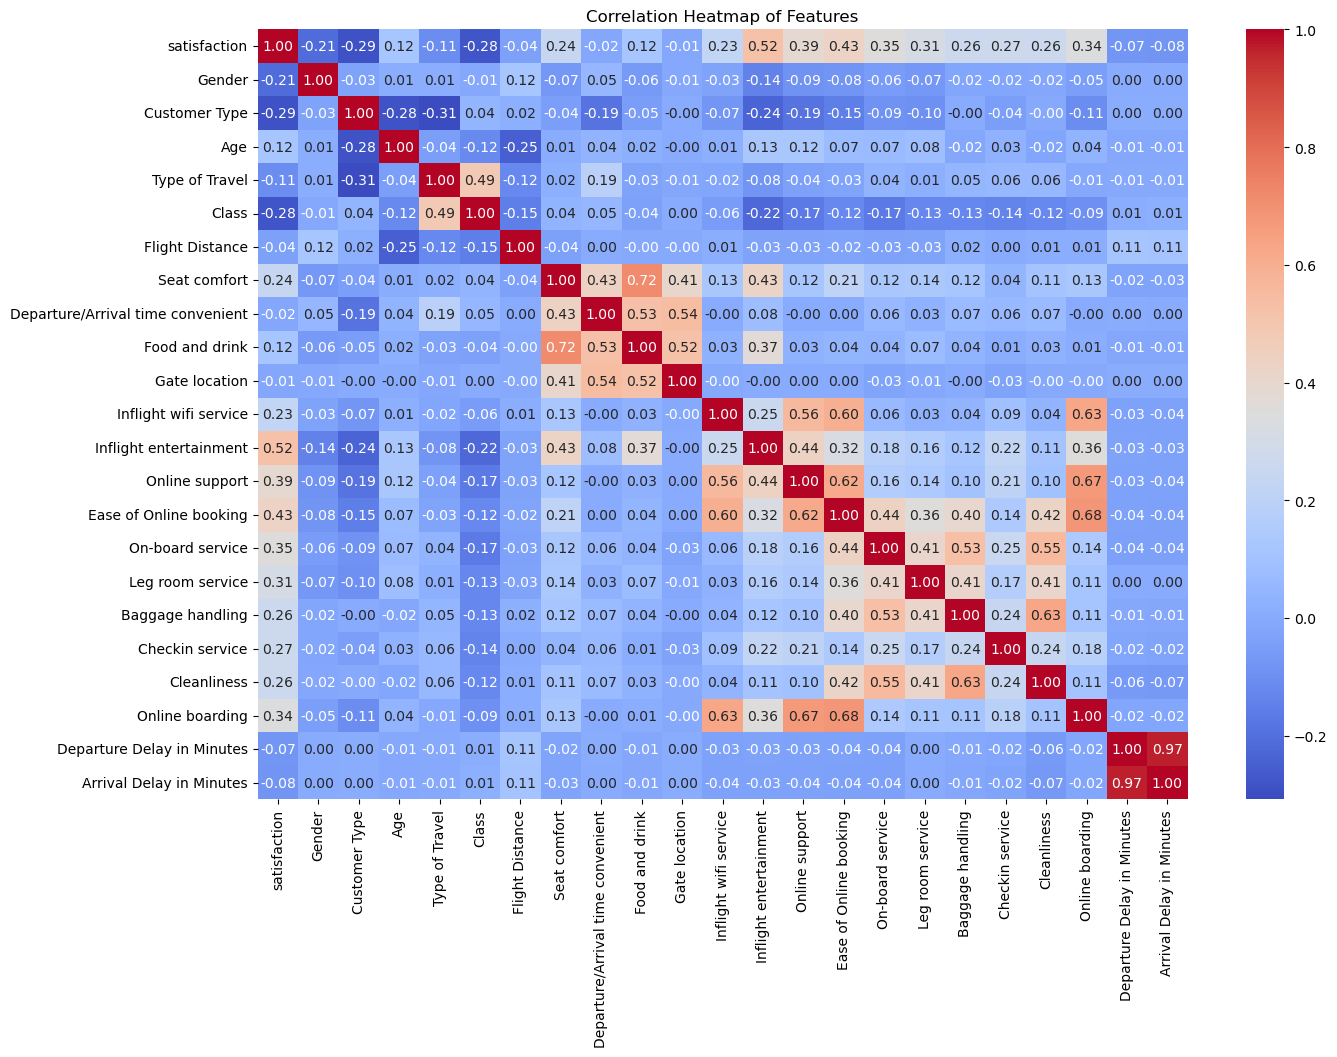

In [10]:
import seaborn as sns

# Calculating correlation matrix
correlation_matrix = airline_data_cleaned.drop('satisfaction_category', axis=1).corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()


# The Results
I began by cleaning the dataset, which involved removing rows with missing values in the 'Arrival Delay in MInutes' column. I then, encoded categorical variables into numerica format to prepare the data for modeling. 

For the predictive modeling portion, I built a Random Forest Classifier that achieved an accuracy of 95.9%. This high level of accuracy shows that the model is very effective at predicting cusomter satisfaction based on the provided paramenters. The most important features that brought customer satisfaction up was 'Inflight wifi service' and 'Ease of Online booking' many people enjoy the digital experience when it comes to satisfaction.

For the visualizations to further explore the data, first I explored a bar chart, as suggested by one of my peers, which compared service features between satisfied and dissatisfied customers highlighted that aspects like Seat Comfort and Cleanliness are rated higher by satisfied customers, emphasizing these as critical areas for maintaining high satisfaction.Then from there I explored a Correlation Heatmap, which reinforced the importance of digital services (like wifi and online booking) and showed that some operational factors like departure/arrival timing have low correlation with satisfaction, potentially guiding resource allocation in service improvements.


# Conclusion & Reccomendations 
Enhancements in digital services such as inflight wifi and online booking systems are crucial, as these features strongly influence passenger satisfaction. Different agre groups have varying levels of satisfaction, suggesting tailored improvements could enhance experience for specific demographics. High standard in seat comfort and cleanliness are pivotal in achieving customer satisfaction, making the key areas for constant improvement. 

As for reccomendations, focus on enhancing digital intercations, giving more user friendly and readily avaliable digital services. Target improvements based on age, with age-specific amenities that could cater to specific groups. Maintain high standards of physical comfort and cleanliness. 